In [1126]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Define variables of the task:

## Variables of the experiment are set: number of trials in each block, reward ratio pairs, number of blocks

In [1228]:
n_trials_base=100;
n_trials_sd=10;

reward_ratio_pairs=[[.4,.05],[.3857,.0643],[.3375,.1125],[.225,.225]]
blocknum = 7
p_reward_L=[.225]
p_reward_R=[.225]
for i in range(blocknum):
    ratiopairidx=np.random.choice(range(len(reward_ratio_pairs)))
    reward_ratio_pair=reward_ratio_pairs[ratiopairidx]
    np.random.shuffle(reward_ratio_pair)
    p_reward_L.append(reward_ratio_pair[0])
    p_reward_R.append(reward_ratio_pair[1])


#p_reward_L = [.1 ,.3,.1,.5] # probabilities of getting reward on choosing left
#p_reward_R = [.3,.1,.5,.1] # probabilities of getting reward on choosing right
n_trials = np.round(np.random.normal(0,n_trials_sd,len(p_reward_L)) + n_trials_base).astype(int)# number of trials in each block


print('probability of reward on R:',p_reward_R)
print('probability of reward on L:',p_reward_L)
print('trialnum in each block: ', n_trials)

probability of reward on R: [0.225, 0.3375, 0.3375, 0.225, 0.05, 0.1125, 0.3857, 0.4]
probability of reward on L: [0.225, 0.1125, 0.1125, 0.225, 0.4, 0.3375, 0.0643, 0.05]
trialnum in each block:  [ 93  92 105  93  97  93 104  94]


### Two types of timedependent weighting kernels were used: one which uses the choice history and one which uses the reward history

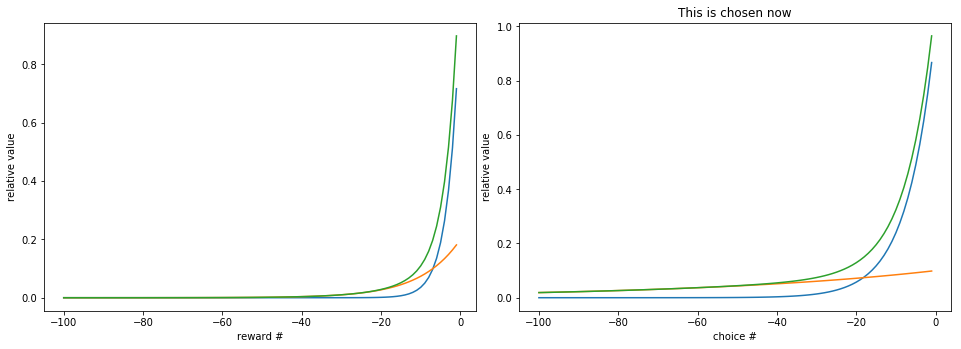

In [1244]:
only_rewarded = False

tau_rewardnum_only_rewarded = 20 # for boxcar
tau_choicenum_only_rewarded = 3 # for smooth
tau_choicenum_slow_only_rewarded = 10 # for smooth
tau_fast_slow_amplituderatio_only_rewarded = 5

tau_rewardnum_all_choices = 20 # for boxcar
tau_choicenum_all_choices = 7 # for smooth
tau_choicenum_slow_all_choices = 60 # for smooth
tau_fast_slow_amplituderatio_all_choices = 10
    
x=np.arange(100,0,-1)
yfast_only_rewarded=np.exp(-x/tau_choicenum_only_rewarded)
yslow_only_rewarded=np.exp(-x/tau_choicenum_slow_only_rewarded)/tau_fast_slow_amplituderatio_only_rewarded
y_only_rewarded=yfast_only_rewarded+yslow_only_rewarded
yfast_all_choices=np.exp(-x/tau_choicenum_all_choices)
yslow_all_choices=np.exp(-x/tau_choicenum_slow_all_choices)/tau_fast_slow_amplituderatio_all_choices
y_all_choices=yfast_all_choices+yslow_all_choices

fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.plot(range(-100,0),yfast_only_rewarded[-100:],range(-100,0),yslow_only_rewarded[-100:],range(-100,0),y_only_rewarded[-100:])
plt.xlabel('reward #')
plt.ylabel('relative value')
if only_rewarded:
    plt.title('This is chosen now')
    

ax2=fig.add_axes([1.1,0,1,1])
ax2.plot(range(-100,0),yfast_all_choices[-100:],range(-100,0),yslow_all_choices[-100:],range(-100,0),y_all_choices[-100:])
plt.xlabel('choice #')
plt.ylabel('relative value')
if not only_rewarded:
    plt.title('This is chosen now')
    
    
if only_rewarded:
    tau_rewardnum = tau_rewardnum_only_rewarded # for boxcar
    tau_choicenum = tau_choicenum_only_rewarded # for smooth
    tau_choicenum_slow = tau_choicenum_slow_only_rewarded # for smooth
    tau_fast_slow_amplituderatio = tau_fast_slow_amplituderatio_only_rewarded
else:
    tau_rewardnum = tau_rewardnum_all_choices # for boxcar
    tau_choicenum = tau_choicenum_all_choices # for smooth
    tau_choicenum_slow = tau_choicenum_slow_all_choices # for smooth
    tau_fast_slow_amplituderatio = tau_fast_slow_amplituderatio_all_choices

## Simulation: - reward is reassigned on every trial

0 93 [ 51 106 157 205 272 348 412] 0.3684 0.3455
1 92 [ 51 106 157 205 272 348 412] 0.1786 0.4531
2 105 [ 51 106 157 205 272 348 412] 0.2619 0.4762
3 93 [ 51 106 157 205 272 348 412] 0.3208 0.275
4 97 [ 51 106 157 205 272 348 412] 0.4524 0.3077
5 93 [ 51 106 157 205 272 348 412] 0.4627 0.3077
6 104 [ 51 106 157 205 272 348 412] 0.1111 0.4416
7 94 [ 51 106 157 205 272 348 412] 0.2 0.4524
expected L:  [0.225, 0.1125, 0.1125, 0.225, 0.4, 0.3375, 0.0643, 0.05]
actual   L:  [0.3684 0.1786 0.2619 0.3208 0.4524 0.4627 0.1111 0.2   ]
expected R:  [0.225, 0.3375, 0.3375, 0.225, 0.05, 0.1125, 0.3857, 0.4]
actual   R:  [0.3455 0.4531 0.4762 0.275  0.3077 0.3077 0.4416 0.4524]


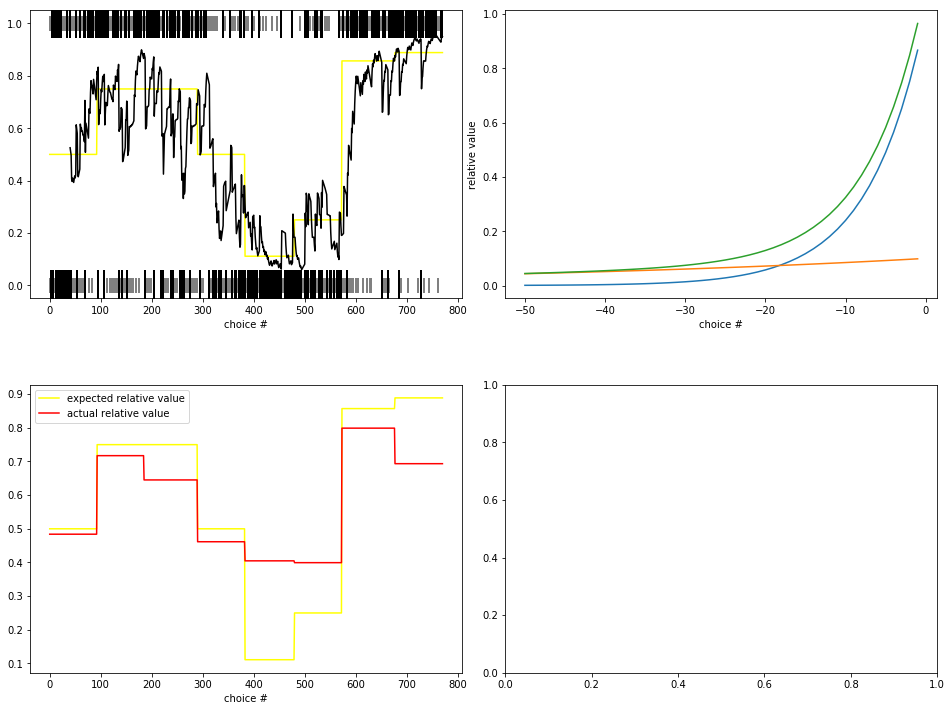

In [1299]:
unchosen_rewards_to_keep = 1

subject = 'clever mouse' # 'clever mouse' / 'random'

accumulated_rewards_L = 0
accumulated_rewards_R = 0

history_choice = np.array([],dtype=int)#1 is right, 0 is left
history_reward = np.full(0,True,dtype=bool)
history_rewardrate_constant=np.array([])#1 is right, 0 is left
history_rewardrate_dynamic=np.array([])#1 is right, 0 is left
for blocknum in range(len(p_reward_L)):
    for i_trial in range(n_trials[blocknum]):
        rewardrate_constant=(p_reward_R[blocknum])/(p_reward_R[blocknum]+p_reward_L[blocknum])#/2+.5; # current flat reward rate
        history_rewardrate_constant=np.append(history_rewardrate_constant,rewardrate_constant)
        
        if len(history_choice) < tau_choicenum or sum(history_reward == True) < tau_rewardnum:
            choice=np.random.choice(['left','right']) # this will be given by the model
            history_rewardrate_dynamic=np.append(history_rewardrate_dynamic,[np.NaN])
        else:
            
            if only_rewarded:
                x=np.arange(sum(history_reward),0,-1)
                yfast=np.exp(-x/tau_choicenum)
                yslow=np.exp(-x/tau_choicenum_slow)/tau_fast_slow_amplituderatio
                y=yfast+yslow
                history_reward_local=y
                history_choice_local=history_choice[history_reward == True]
            else:
                x=np.arange(len(history_choice),0,-1)
                yfast=np.exp(-x/tau_choicenum)
                yslow=np.exp(-x/tau_choicenum_slow)/tau_fast_slow_amplituderatio
                y=yfast + yslow
                history_reward_local=history_reward*y
                history_choice_local=history_choice
            
            rewardrate_left=np.mean(history_reward_local[history_choice_local==0])
            rewardrate_right=np.mean(history_reward_local[history_choice_local==1])
            rewardrate_dynamic=(rewardrate_right)/(rewardrate_right+rewardrate_left)
            history_rewardrate_dynamic=np.append(history_rewardrate_dynamic,[rewardrate_dynamic])
            
            if subject == 'random':
                rewardrate_dynamic = .5
            
            if np.random.uniform(0,1)<=rewardrate_dynamic:
                choice='right'
            else:
                choice='left'

        if choice == 'right':
            prob=p_reward_R[blocknum]
            accumulated_rewards = accumulated_rewards_R
            accumulated_rewards_R = 0
            history_choice=np.append(history_choice,[1])
            if accumulated_rewards_L < unchosen_rewards_to_keep and np.random.uniform(0,1)<p_reward_L[blocknum]:
                accumulated_rewards_L += 1
        else:
            prob=p_reward_L[blocknum]
            accumulated_rewards = accumulated_rewards_L
            accumulated_rewards_L = 0
            history_choice=np.append(history_choice,[0])
            if accumulated_rewards_R < unchosen_rewards_to_keep and np.random.uniform(0,1) < p_reward_R[blocknum]:
                accumulated_rewards_R += 1
            
        if np.random.uniform(0,1)<prob or accumulated_rewards:
            reward = True
        else:
            reward = False   
        history_reward=np.append(history_reward,[reward])

        
        
history_choicenum = np.arange(0,len(history_choice))
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.plot(history_choicenum[history_reward==False], history_choice[history_reward==False],'|',color='gray',markersize=15,markeredgewidth=2)
ax1.plot(history_choicenum[history_reward==True], history_choice[history_reward==True],'k|',color='black',markersize=30,markeredgewidth=2)
# constant reward rate
ax1.plot(history_choicenum,history_rewardrate_constant,color='yellow')
#ax1.plot(history_choicenum,history_rewardrate_constant_actual,color='red')
ax1.plot(history_choicenum,history_rewardrate_dynamic,color='black')   
plt.xlabel('choice #')

ax2=fig.add_axes([1.1,0,1,1])
ax2.plot(range(-50,0),yfast[-50:],range(-50,0),yslow[-50:],range(-50,0),y[-50:])
plt.xlabel('choice #')
plt.ylabel('relative value')


# calculating actual rewardrates
block_idx_edges = np.concatenate((np.array([0]),np.cumsum(n_trials[:len(n_trials)])))
history_rewardrate_constant_actual = np.zeros(len(history_rewardrate_constant))
p_reward_L_actual =np.zeros(len(p_reward_L))
p_reward_R_actual =np.zeros(len(p_reward_R))
for blocki, blocknum in enumerate(n_trials):
    idxnow=range(block_idx_edges[blocki],block_idx_edges[blocki+1])
    choices_block = history_choice[idxnow]
    rewards_block = history_reward[idxnow]
    rewardrate_L = np.around(np.mean(rewards_block[choices_block == 0]),4)
    rewardrate_R = np.around(np.mean(rewards_block[choices_block == 1]),4)
    history_rewardrate_constant_actual[idxnow] = rewardrate_R/(rewardrate_R+rewardrate_L)
    p_reward_L_actual[blocki] = rewardrate_L
    p_reward_R_actual[blocki] = rewardrate_R
    
    print(blocki, blocknum,blockidxes,rewardrate_L,rewardrate_R)
print('expected L: ',p_reward_L)
print('actual   L: ',p_reward_L_actual)
print('expected R: ',p_reward_R)
print('actual   R: ',p_reward_R_actual)
ax3=fig.add_axes([0,-1.3,1,1])
ax3.plot(history_choicenum,history_rewardrate_constant,color='yellow',label = 'expected relative value')
ax3.plot(history_choicenum,history_rewardrate_constant_actual,color='red',label = 'actual relative value')
plt.xlabel('choice #')
plt.legend()

ax4=fig.add_axes([1.1,-1.3,1,1])


In [1212]:
%whos

Variable                                     Type        Data/Info
------------------------------------------------------------------
a                                            list        n=2
accumulated_rewards                          int         0
accumulated_rewards_L                        int         0
accumulated_rewards_R                        int         0
ax                                           NoneType    None
ax1                                          Axes        Axes(0,0;1x1)
ax2                                          Axes        Axes(1.1,0;1x1)
ax3                                          Axes        Axes(0,-1.3;1x1)
block_idx_edges                              ndarray     9: 9 elems, type `int64`, 72 bytes
block_idx_start                              ndarray     8: 8 elems, type `int64`, 64 bytes
blocki                                       int         7
blockidxes                                   ndarray     7: 7 elems, type `int64`, 56 bytes
blocknum     